# Contrôlez la variance à l’aide du bagging

Le bagging qui est un diminutif de bootstrap aggregation (vous allez comprendre ce nom dans un instant) est une méthode permettant de combiner nos fameux apprenants faibles. Le principe est de créer un dataset différent pour entrainer nos différents apprenants. Pour cela on va appliquer notre méthode statistique du bootstrap : pour rappel, cela consiste à échantillonner avec replacement notre dataset de taille N afin d’obtenir un nouveau dataset de taille N. Chaque observation a une chance 1 / N d’être tirée et on répète ce processus N fois.

Attends une seconde, on échantillonne pour obtenir un dataset de même taille, quel est l’intérêt ?

Rappelez-vous, notre idée de base est de combiner les apprenants faibles. Pour générer des apprenants faibles (qui soient suffisamment différents de surcroît), une solution est de les entraîner sur un nouveau dataset. En considérant que l'on n'a pas une infinité de données, une solution est donc de “générer” (c'est-à-dire bootstraper) de nouveaux dataset qui “ressemblent” (en terme de distribution de probabilités) au dataset original. On échantillonne donc un dataset de taille N a partir de notre dataset original de taille N. 😉

Une fois que l’on a nos modèles, on effectue une prédiction simplement en effectuant un vote à la majorité pour la classification, ou la moyenne pour la régression.

On crée un certain nombre d’apprenants faibles. La notion de “faible” désigne notamment le fait que nos modèles possèdent une forte variance. Le bagging permet de réduire la variance des estimateurs individuels et offre une prédiction plus performante et plus stable, dépendante du nombre d’apprenants faibles utilisés. 

# Comparaison avec un estimateur unique

Nous allons observer l'effet des méthodes ensemblistes sur un petit jeu de données factice, afin de nous rendre compte de l'effet du bagging.

Commençons par créer un jeu de données d'exemple, à l'aide de la fonction make_moons

In [8]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25)

On sépare ensuite le jeu de données en données d'entraînement et données test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

On peut maintenant créer notre modèle de bagging à l'aide de la fonction  BaggingClassifier  . Par défaut, le classifieur de base utilisé par Scikit learn est un arbre de décision donc inutile de le préciser. En revanche, on précise le nombre de classifieurs individuels utilisés (en l'occurence 5).

In [10]:
from sklearn.ensemble import BaggingClassifier 

bagging = BaggingClassifier(n_estimators=5)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=5,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

On va maintenant afficher les différentes zones de classifications des arbres ainsi que du bagging de ces arbres. Pour cela j'ai utilisé deux fonctions d'affichage :  plot_tree_partition  et  plot_2d_separator  disponibles ici. Le plus simple est d'installer le packagemglearnavec la commande:


In [11]:
#pip install mglearn

In [12]:
# Puis d'importer les fonctions:

from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

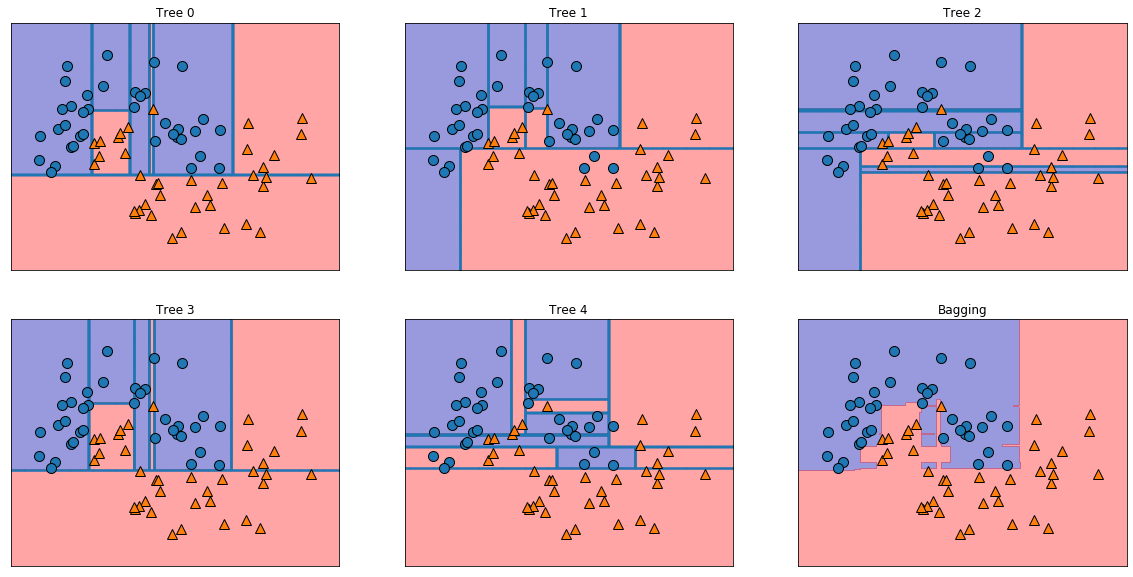

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

On peut voir  que les arbres effectuent des erreurs (overfitting) relativement différentes, qui une fois combinés par le bagging sont lissées et donnent une bien meilleure performance. Et encore, n'on a utilisé que 5 arbres à des fins de démonstration, mais en réalité on va en utiliser bien plus en pratique (des centaines voir des milliers).

# Conclusion

Nous avons vu l'algorithme fondamental du bagging qui est une base pour beaucoup d'algorithmes ensemblistes même si ce n'est pas celui que l'on va utiliser le plus souvent en pratique. Passons maintenant à un algorithme phare : les forêts aléatoires !